In [1]:
import numpy as np
from multiple_factor import DGP2, Inferece2
from dgp import DGP
from inference import Inference

def reject_prob(Xdim, num_factor, sample_size, tau=0, ntrials=1000, more=False):
    phi_tau = np.zeros(ntrials)
    for i in range(ntrials):
        dgp = DGP2(num_factor, sample_size, Xdim, tau, more)
        Y, D, tuple_idx = dgp.Y, dgp.D, dgp.tuple_idx
        inf = Inferece2(Y, D, tuple_idx)
        phi_tau[i] = inf.phi_tau
    return np.mean(phi_tau)

"""
def reject_prob1(n, modelY='1', modelDA='8', ate=0, ntrials=1000):
    phi_tau11s, phi_tau10s, phi_theta1s, phi_theta2s, phi_theta12s = np.zeros(ntrials), np.zeros(ntrials), np.zeros(ntrials), np.zeros(ntrials), np.zeros(ntrials)
    for i in range(ntrials):
        dgp = DGP(modelY,modelDA,n,tau=ate)
        inf = Inference(dgp.Y, dgp.D, dgp.A, modelDA, tuple_idx=dgp.tuple_idx, tau=dgp.tau)
        phi_tau11, phi_tau10, phi_theta1, phi_theta2, phi_theta12 = inf.inference()
        phi_tau11s[i] = phi_tau11
        phi_tau10s[i] = phi_tau10
        phi_theta1s[i] = phi_theta1
        phi_theta2s[i] = phi_theta2
        phi_theta12s[i] = phi_theta12
        break
    return phi_tau11s, phi_tau10s, phi_theta1s, phi_theta2s, phi_theta12s
"""


"""
res, res_p = np.zeros((4,5)), np.zeros((4,5))
for i, q in enumerate([1, 2, 4, 8]):
    for j, k in enumerate([2, 3, 4, 5, 6]):
        p1, p2 = reject_prob(q, k, 1280, 500)
        res[i,j] = p1
        res_p[i,j] = p2
        print("q={}, k={}, p1={},p2={}".format(q,k,p1,p2))
"""

#print(reject_prob(2, 1, 1280, tau=0, ntrials=100, more=True))

'\nres, res_p = np.zeros((4,5)), np.zeros((4,5))\nfor i, q in enumerate([1, 2, 4, 8]):\n    for j, k in enumerate([2, 3, 4, 5, 6]):\n        p1, p2 = reject_prob(q, k, 1280, 500)\n        res[i,j] = p1\n        res_p[i,j] = p2\n        print("q={}, k={}, p1={},p2={}".format(q,k,p1,p2))\n'

In [2]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
qk_pairs = [(q,k) for q in [1,2,4,8,10] for k in [2,3,4,5,6]]
def processInput(qk):
    q, k = qk
    p1, p2 = reject_prob(q, k, 1280, 1000)
    return (q,k,p1,p2)
num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qk_pairs)
print(results)

[(1, 2, 0.059, 0.059), (1, 3, 0.051, 0.049), (1, 4, 0.048, 0.046), (1, 5, 0.051, 0.052), (1, 6, 0.038, 0.038), (2, 2, 0.029, 0.025), (2, 3, 0.019, 0.014), (2, 4, 0.008, 0.007), (2, 5, 0.005, 0.005), (2, 6, 0.002, 0.002), (4, 2, 0.009, 0.006), (4, 3, 0.008, 0.006), (4, 4, 0.006, 0.006), (4, 5, 0.008, 0.008), (4, 6, 0.005, 0.005), (8, 2, 0.018, 0.011), (8, 3, 0.011, 0.01), (8, 4, 0.011, 0.011), (8, 5, 0.023, 0.022), (8, 6, 0.025, 0.025), (10, 2, 0.019, 0.013), (10, 3, 0.014, 0.012), (10, 4, 0.012, 0.01), (10, 5, 0.014, 0.012), (10, 6, 0.021, 0.021)]


[(1, 2, 0.059, 0.059), (1, 3, 0.051, 0.049), (1, 4, 0.048, 0.046), (1, 5, 0.051, 0.052), (1, 6, 0.038, 0.038), (2, 2, 0.029, 0.025), (2, 3, 0.019, 0.014), (2, 4, 0.008, 0.007), (2, 5, 0.005, 0.005), (2, 6, 0.002, 0.002), (4, 2, 0.009, 0.006), (4, 3, 0.008, 0.006), (4, 4, 0.006, 0.006), (4, 5, 0.008, 0.008), (4, 6, 0.005, 0.005), (8, 2, 0.018, 0.011), (8, 3, 0.011, 0.01), (8, 4, 0.011, 0.011), (8, 5, 0.023, 0.022), (8, 6, 0.025, 0.025), (10, 2, 0.019, 0.013), (10, 3, 0.014, 0.012), (10, 4, 0.012, 0.01), (10, 5, 0.014, 0.012), (10, 6, 0.021, 0.021)]

In [79]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
qk_pairs = [(q,k) for q in [1,2,4,8,10] for k in [2,3,4,5,6]]
def processInput(qk):
    q, k = qk
    p1, p2 = reject_prob(q, k, 1280, 0.02, 1000)
    return (q,k,p1,p2)
num_cores = multiprocessing.cpu_count()
results2 = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qk_pairs)
print(results2)

[(1, 2, 0.937, 0.939), (1, 3, 0.936, 0.938), (1, 4, 0.951, 0.95), (1, 5, 0.938, 0.938), (1, 6, 0.928, 0.927), (2, 2, 0.893, 0.884), (2, 3, 0.818, 0.81), (2, 4, 0.609, 0.593), (2, 5, 0.324, 0.317), (2, 6, 0.116, 0.113), (4, 2, 0.198, 0.158), (4, 3, 0.096, 0.081), (4, 4, 0.06, 0.054), (4, 5, 0.039, 0.037), (4, 6, 0.026, 0.026), (8, 2, 0.045, 0.035), (8, 3, 0.024, 0.019), (8, 4, 0.032, 0.03), (8, 5, 0.028, 0.028), (8, 6, 0.028, 0.028), (10, 2, 0.029, 0.022), (10, 3, 0.019, 0.017), (10, 4, 0.02, 0.018), (10, 5, 0.031, 0.03), (10, 6, 0.035, 0.033)]


[(1, 2, 0.937, 0.939), (1, 3, 0.936, 0.938), (1, 4, 0.951, 0.95), (1, 5, 0.938, 0.938), (1, 6, 0.928, 0.927), (2, 2, 0.893, 0.884), (2, 3, 0.818, 0.81), (2, 4, 0.609, 0.593), (2, 5, 0.324, 0.317), (2, 6, 0.116, 0.113), (4, 2, 0.198, 0.158), (4, 3, 0.096, 0.081), (4, 4, 0.06, 0.054), (4, 5, 0.039, 0.037), (4, 6, 0.026, 0.026), (8, 2, 0.045, 0.035), (8, 3, 0.024, 0.019), (8, 4, 0.032, 0.03), (8, 5, 0.028, 0.028), (8, 6, 0.028, 0.028), (10, 2, 0.029, 0.022), (10, 3, 0.019, 0.017), (10, 4, 0.02, 0.018), (10, 5, 0.031, 0.03), (10, 6, 0.035, 0.033)]

In [6]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
qs = [1,2,4,8,10]
def processInput(q):
    p = reject_prob(q, 1, 1280, 0, 1000)
    return (q,1,p)
num_cores = multiprocessing.cpu_count()
results3 = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qs)
print(results3)

def processInput(q):
    p = reject_prob(q, 1, 1280, 0.02, 1000)
    return (q,1,p)
num_cores = multiprocessing.cpu_count()
results4 = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qs)
print(results4)

[(1, 1, 0.043), (2, 1, 0.055), (4, 1, 0.02), (8, 1, 0.014), (10, 1, 0.019)]
[(1, 1, 0.958), (2, 1, 0.926), (4, 1, 0.392), (8, 1, 0.065), (10, 1, 0.056)]


In [8]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
qk_pairs = [(q,k) for q in [1,2,4,8,10] for k in [1,2,3,4,5,6]]
def processInput(qk):
    q, k = qk
    p = reject_prob(q, k, 1280, 0, 1000, True)
    return (q,k,p)
num_cores = multiprocessing.cpu_count()
results5 = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qk_pairs)
print(results5)

/Users/liujizhou/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[(1, 1, 0.045), (1, 2, 0.049), (1, 3, 0.049), (1, 4, 0.055), (1, 5, 0.06), (1, 6, 0.051), (2, 1, 0.047), (2, 2, 0.046), (2, 3, 0.049), (2, 4, 0.042), (2, 5, 0.052), (2, 6, 0.046), (4, 1, 0.06), (4, 2, 0.049), (4, 3, 0.046), (4, 4, 0.045), (4, 5, 0.05), (4, 6, 0.043), (8, 1, 0.05), (8, 2, 0.06), (8, 3, 0.052), (8, 4, 0.054), (8, 5, 0.048), (8, 6, 0.048), (10, 1, 0.053), (10, 2, 0.042), (10, 3, 0.043), (10, 4, 0.05), (10, 5, 0.033), (10, 6, 0.055)]


[(1, 1, 0.045), (1, 2, 0.049), (1, 3, 0.049), (1, 4, 0.055), (1, 5, 0.06), (1, 6, 0.051), (2, 1, 0.047), (2, 2, 0.046), (2, 3, 0.049), (2, 4, 0.042), (2, 5, 0.052), (2, 6, 0.046), (4, 1, 0.06), (4, 2, 0.049), (4, 3, 0.046), (4, 4, 0.045), (4, 5, 0.05), (4, 6, 0.043), (8, 1, 0.05), (8, 2, 0.06), (8, 3, 0.052), (8, 4, 0.054), (8, 5, 0.048), (8, 6, 0.048), (10, 1, 0.053), (10, 2, 0.042), (10, 3, 0.043), (10, 4, 0.05), (10, 5, 0.033), (10, 6, 0.055)]

In [8]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
qk_pairs = [(q,k) for q in [1,2,4,8,10] for k in [1,2,3,4,5,6]]
def processInput(qk):
    q, k = qk
    p = reject_prob(q, k, 1280, 0.02, 1000, True)
    return (q,k,p)
num_cores = multiprocessing.cpu_count()
results5 = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in qk_pairs)
print(results5)

/Users/liujizhou/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[(1, 1, 0.937), (1, 2, 0.95), (1, 3, 0.95), (1, 4, 0.952), (1, 5, 0.939), (1, 6, 0.927), (2, 1, 0.927), (2, 2, 0.893), (2, 3, 0.834), (2, 4, 0.673), (2, 5, 0.499), (2, 6, 0.317), (4, 1, 0.376), (4, 2, 0.282), (4, 3, 0.204), (4, 4, 0.159), (4, 5, 0.115), (4, 6, 0.093), (8, 1, 0.11), (8, 2, 0.094), (8, 3, 0.078), (8, 4, 0.067), (8, 5, 0.062), (8, 6, 0.061), (10, 1, 0.09), (10, 2, 0.071), (10, 3, 0.068), (10, 4, 0.074), (10, 5, 0.067), (10, 6, 0.059)]


[(1, 1, 0.937), (1, 2, 0.95), (1, 3, 0.95), (1, 4, 0.952), (1, 5, 0.939), (1, 6, 0.927), (2, 1, 0.927), (2, 2, 0.893), (2, 3, 0.834), (2, 4, 0.673), (2, 5, 0.499), (2, 6, 0.317), (4, 1, 0.376), (4, 2, 0.282), (4, 3, 0.204), (4, 4, 0.159), (4, 5, 0.115), (4, 6, 0.093), (8, 1, 0.11), (8, 2, 0.094), (8, 3, 0.078), (8, 4, 0.067), (8, 5, 0.062), (8, 6, 0.061), (10, 1, 0.09), (10, 2, 0.071), (10, 3, 0.068), (10, 4, 0.074), (10, 5, 0.067), (10, 6, 0.059)]

In [5]:
def ate(Xdim, num_factor, sample_size, ntrials=1000, more=False):
    ates = np.zeros(ntrials)
    for i in range(ntrials):
        dgp = DGP2(num_factor, sample_size, Xdim, match_more=more)
        Y, D, tuple_idx = dgp.Y, dgp.D, dgp.tuple_idx
        inf = Inferece2(Y, D, tuple_idx)
        ate = inf.tau
        ates[i] = ate
    return ates

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()


def plot_hist(tau1, tau2, tau3, tau4):
    
    fig, axs = plt.subplots(1, 4, figsize=(23, 5))
    
    axs[0].hist(tau1, color="b", bins='auto', density=True)
    axs[0].set_xlabel("Dim(X)=1, K=2")
    axs[0].set_ylabel("Count")
    axs[0].axvline(x=np.mean(tau1), ymin=0, ymax=3000, color="k", linestyle="--")
    mu, std = norm.fit(tau1)
    xmin, xmax = -0.02, 0.02
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[0].plot(x, p, 'k', linewidth=2)

    axs[2].hist(tau2, color="b", bins='auto', density=True)
    axs[2].set_xlabel("Dim(X)=10, K=2")
    axs[2].set_ylabel("Count")
    axs[2].axvline(x=np.mean(tau2), ymin=0, ymax=3000, color="k", linestyle="--")
    mu, std = norm.fit(tau2)
    xmin, xmax = -0.1, 0.1
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[2].plot(x, p, 'k', linewidth=2)
    
    axs[1].hist(tau3, color="b", bins='auto', density=True)
    axs[1].set_xlabel("Dim(X)=1, K=6")
    axs[1].set_ylabel("Count")
    axs[1].axvline(x=np.mean(tau3), ymin=0, ymax=3000, color="k", linestyle="--")
    mu, std = norm.fit(tau3)
    xmin, xmax = -0.02, 0.02
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[1].plot(x, p, 'k', linewidth=2)
    
    axs[3].hist(tau4, color="b", bins='auto', density=True)
    axs[3].set_xlabel("Dim(X)=10, K=6")
    axs[3].set_ylabel("Count")
    axs[3].axvline(x=np.mean(tau4), ymin=0, ymax=3000, color="k", linestyle="--")
    mu, std = norm.fit(tau4)
    xmin, xmax = -0.2, 0.2
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[3].plot(x, p, 'k', linewidth=2)
    
    return fig

In [7]:
tau1 = ate(1, 2, 1280, 1000)
tau2 = ate(10, 2, 1280, 1000)
tau3 = ate(1, 6, 1280, 1000)
tau4 = ate(10, 6, 1280, 1000)

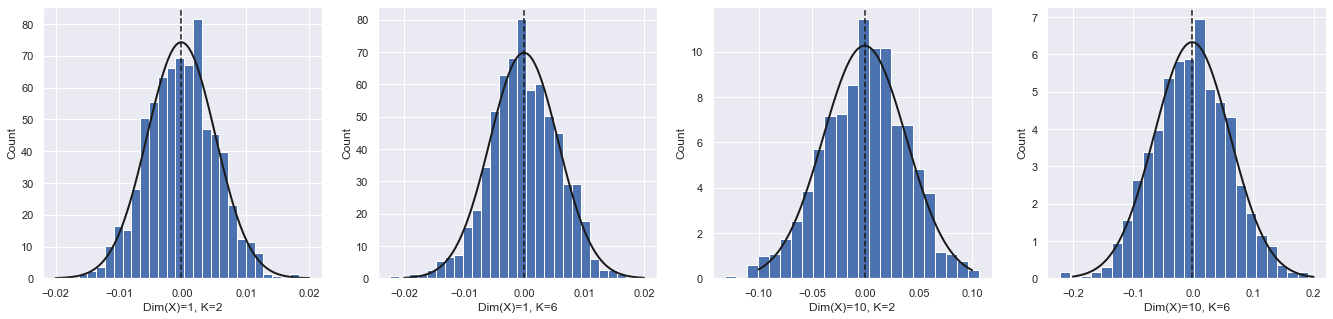

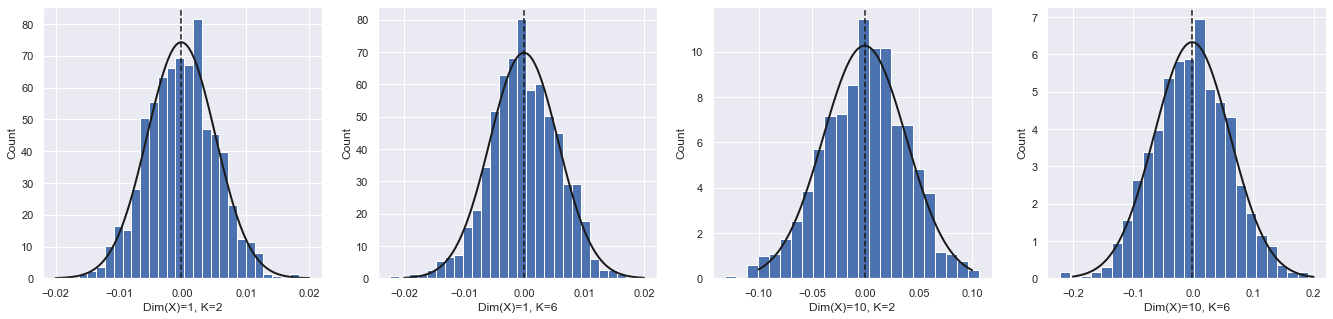

In [71]:
plot_hist(tau1, tau2, tau3, tau4)

In [6]:
tau1 = ate(1, 2, 1280, 1000, more=True)
tau2 = ate(10, 2, 1280, 1000, more=True)
tau3 = ate(1, 6, 1280, 1000, more=True)
tau4 = ate(10, 6, 1280, 1000, more=True)

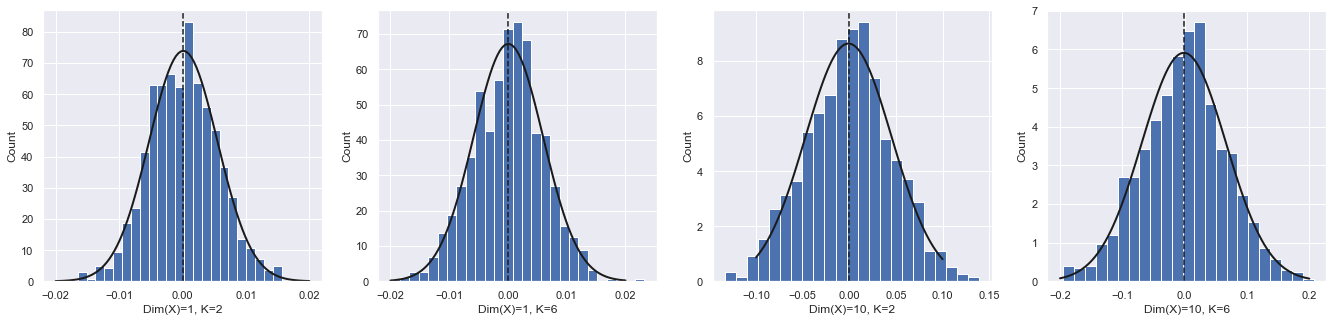

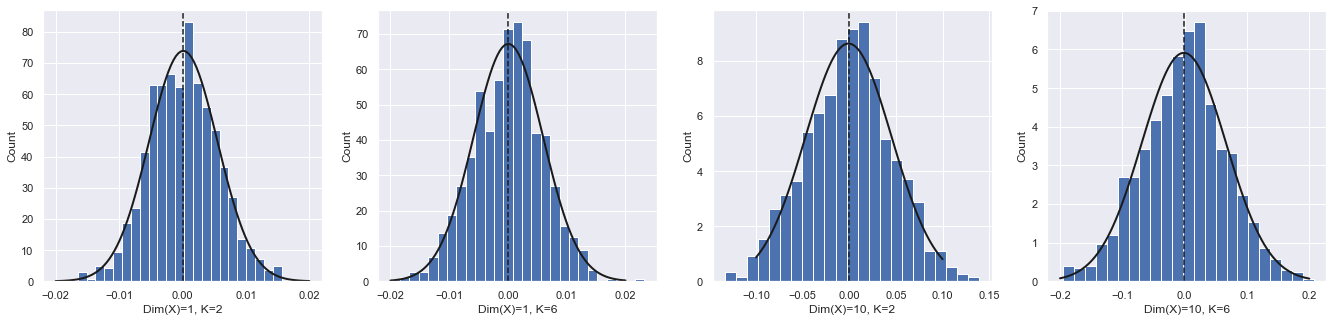

In [7]:
plot_hist(tau1, tau2, tau3, tau4)